In [1]:
import seaborn as sns

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Get Trial Database

In [3]:
# config = Config('/home/robert/Research/hyperparamopt/Trial Data/DHFR/Random-GMRQ-2/alpha_angle.yaml')
# df = config.trial_results()
df = pd.read_pickle('/home/robert/Research/hyperparamopt/DHFR/Random-GMRQ-CSE/cse_trials.pickl')

In [4]:
print(df.shape)
df.head()


(1516, 21)


,completed,config_sha1,elapsed,host,id,mean_test_score,mean_train_score,n_test_samples,n_train_samples,parameters,...,started,status,test_scores,traceback,train_scores,user,cse_test_scores,cse_train_gaps,cse_train_n_timescales,cse_train_scores
0,2017-08-03 20:16:52.451687,11d05ee0f2efe3233a58a40ac81bbb9962bf882a,1970-01-01 00:02:15.233066,compute249.bc4.acrc.priv,2,2.613855,2.922517,"[75000, 75000, 75000, 75000, 75000]","[75000, 75000, 75000, 75000, 75000]","{'msm__ergodic_cutoff': 'on', 'cluster__n_clus...",...,2017-08-03 20:14:37.218621,SUCCEEDED,"[2.7929254738960707, 2.806366141062694, 2.6499...",None,"[2.8238005249605154, 2.870721463825274, 2.9884...",ra15808,"[2.89158682876, 2.95876476278]","[3.81755857852, 5.22361262217]","[2, 2]","[2.88253553328, 2.99761449691]"
1,2017-08-03 20:32:19.317085,11d05ee0f2efe3233a58a40ac81bbb9962bf882a,1970-01-01 00:17:41.918205,compute249.bc4.acrc.priv,3,2.561150,2.970864,"[75000, 75000, 75000, 75000, 75000]","[75000, 75000, 75000, 75000, 75000]","{'msm__ergodic_cutoff': 'on', 'cluster__n_clus...",...,2017-08-03 20:14:37.398880,SUCCEEDED,"[2.7309232422787275, 2.5163258459570557, 2.645...",None,"[2.96773553090778, 2.969495071361183, 2.995966...",ra15808,"[1.93702810298, 3.94835019696]","[27.5012731495, 2.99783651606]","[1, 5]","[1.99963157808, 5.94760197817]"
2,2017-08-03 20:28:36.104540,11d05ee0f2efe3233a58a40ac81bbb9962bf882a,1970-01-01 00:13:58.667505,compute249.bc4.acrc.priv,4,2.878763,2.992912,"[75000, 75000, 75000, 75000, 75000]","[75000, 75000, 75000, 75000, 75000]","{'msm__ergodic_cutoff': 'on', 'cluster__n_clus...",...,2017-08-03 20:14:37.437035,SUCCEEDED,"[2.948540113694251, 2.632606230422432, 2.87014...",None,"[2.993834214901289, 2.978360161399329, 2.99909...",ra15808,"[1.99241516759, 2.94191387478]","[7.21133478672, 6.58895199174]","[1, 2]","[1.99984105126, 2.99879909224]"
3,2017-08-03 20:22:28.222725,11d05ee0f2efe3233a58a40ac81bbb9962bf882a,1970-01-01 00:07:50.785734,compute249.bc4.acrc.priv,5,2.388471,2.971272,"[75000, 75000, 75000, 75000, 75000]","[75000, 75000, 75000, 75000, 75000]","{'msm__ergodic_cutoff': 'on', 'cluster__n_clus...",...,2017-08-03 20:14:37.436991,SUCCEEDED,"[1.8985418806233798, 1.859573749968411, 2.5134...",None,"[2.9877866168480036, 2.9321628078314492, 2.997...",ra15808,"[1.95073931904, 2.15522397105]","[7.11496910449, 4.85034054818]","[1, 2]","[1.99785336281, 2.99940793358]"
4,2017-08-03 20:39:29.160628,11d05ee0f2efe3233a58a40ac81bbb9962bf882a,1970-01-01 00:24:51.610195,compute249.bc4.acrc.priv,6,2.854033,2.987659,"[75000, 75000, 75000, 75000, 75000]","[75000, 75000, 75000, 75000, 75000]","{'msm__ergodic_cutoff': 'on', 'cluster__n_clus...",...,2017-08-03 20:14:37.550433,SUCCEEDED,"[2.8355832551294116, 2.797077185532208, 2.9419...",None,"[2.988991097899673, 2.988911714909688, 2.96883...",ra15808,"[None, 2.97253510446]","[7.39080824222, 4.04168151199]","[1, 2]","[1.99992033751, 2.99713226907]"


In [6]:
df = df.loc[:,['parameters', 'test_scores', 'train_scores', 'cse_test_scores', 
               'cse_train_gaps', 'cse_train_n_timescales' , 'cse_train_scores']]
df.head()

,parameters,test_scores,train_scores,cse_test_scores,cse_train_gaps,cse_train_n_timescales,cse_train_scores
0,"{'msm__ergodic_cutoff': 'on', 'cluster__n_clus...","[2.7929254738960707, 2.806366141062694, 2.6499...","[2.8238005249605154, 2.870721463825274, 2.9884...","[2.89158682876, 2.95876476278]","[3.81755857852, 5.22361262217]","[2, 2]","[2.88253553328, 2.99761449691]"
1,"{'msm__ergodic_cutoff': 'on', 'cluster__n_clus...","[2.7309232422787275, 2.5163258459570557, 2.645...","[2.96773553090778, 2.969495071361183, 2.995966...","[1.93702810298, 3.94835019696]","[27.5012731495, 2.99783651606]","[1, 5]","[1.99963157808, 5.94760197817]"
2,"{'msm__ergodic_cutoff': 'on', 'cluster__n_clus...","[2.948540113694251, 2.632606230422432, 2.87014...","[2.993834214901289, 2.978360161399329, 2.99909...","[1.99241516759, 2.94191387478]","[7.21133478672, 6.58895199174]","[1, 2]","[1.99984105126, 2.99879909224]"
3,"{'msm__ergodic_cutoff': 'on', 'cluster__n_clus...","[1.8985418806233798, 1.859573749968411, 2.5134...","[2.9877866168480036, 2.9321628078314492, 2.997...","[1.95073931904, 2.15522397105]","[7.11496910449, 4.85034054818]","[1, 2]","[1.99785336281, 2.99940793358]"
4,"{'msm__ergodic_cutoff': 'on', 'cluster__n_clus...","[2.8355832551294116, 2.797077185532208, 2.9419...","[2.988991097899673, 2.988911714909688, 2.96883...","[None, 2.97253510446]","[7.39080824222, 4.04168151199]","[1, 2]","[1.99992033751, 2.99713226907]"


## Calculate means and variances for observables


In [9]:
def safe_mean(x):
    try:
        return np.array(x).mean()
    except TypeError:
        return np.nan

def safe_error(x):
    try:
        return np.array(x).std()
    except TypeError:
        return np.nan


In [10]:
# Note - this assumes that the folds are all the same size.  This is fine for DHFR as all trajectories are 1000 ns long. 

observables = [ 'test_scores','train_scores', 'cse_test_scores', 'cse_train_gaps', 'cse_train_n_timescales', 'cse_train_scores']

for observable in observables:
        df[observable+'_error'] = df.loc[:, observable].apply(safe_error)
        df[observable+'_mean'] = df.loc[:, observable].apply(safe_mean)




In [11]:
df.head()

,parameters,test_scores,train_scores,cse_test_scores,cse_train_gaps,cse_train_n_timescales,cse_train_scores,test_scores_error,test_scores_mean,train_scores_error,train_scores_mean,cse_test_scores_error,cse_test_scores_mean,cse_train_gaps_error,cse_train_gaps_mean,cse_train_n_timescales_error,cse_train_n_timescales_mean,cse_train_scores_error,cse_train_scores_mean
0,"{'msm__ergodic_cutoff': 'on', 'cluster__n_clus...","[2.7929254738960707, 2.806366141062694, 2.6499...","[2.8238005249605154, 2.870721463825274, 2.9884...","[2.89158682876, 2.95876476278]","[3.81755857852, 5.22361262217]","[2, 2]","[2.88253553328, 2.99761449691]",0.334112,2.613855,0.066870,2.922517,0.033589,2.925176,0.703027,4.520586,0.0,2.0,0.057539,2.940075
1,"{'msm__ergodic_cutoff': 'on', 'cluster__n_clus...","[2.7309232422787275, 2.5163258459570557, 2.645...","[2.96773553090778, 2.969495071361183, 2.995966...","[1.93702810298, 3.94835019696]","[27.5012731495, 2.99783651606]","[1, 5]","[1.99963157808, 5.94760197817]",0.267441,2.561150,0.027551,2.970864,1.005661,2.942689,12.251718,15.249555,2.0,3.0,1.973985,3.973617
2,"{'msm__ergodic_cutoff': 'on', 'cluster__n_clus...","[2.948540113694251, 2.632606230422432, 2.87014...","[2.993834214901289, 2.978360161399329, 2.99909...","[1.99241516759, 2.94191387478]","[7.21133478672, 6.58895199174]","[1, 2]","[1.99984105126, 2.99879909224]",0.128634,2.878763,0.007567,2.992912,0.474749,2.467165,0.311191,6.900143,0.5,1.5,0.499479,2.499320
3,"{'msm__ergodic_cutoff': 'on', 'cluster__n_clus...","[1.8985418806233798, 1.859573749968411, 2.5134...","[2.9877866168480036, 2.9321628078314492, 2.997...","[1.95073931904, 2.15522397105]","[7.11496910449, 4.85034054818]","[1, 2]","[1.99785336281, 2.99940793358]",0.432412,2.388471,0.026558,2.971272,0.102242,2.052982,1.132314,5.982655,0.5,1.5,0.500777,2.498631
4,"{'msm__ergodic_cutoff': 'on', 'cluster__n_clus...","[2.8355832551294116, 2.797077185532208, 2.9419...","[2.988991097899673, 2.988911714909688, 2.96883...","[None, 2.97253510446]","[7.39080824222, 4.04168151199]","[1, 2]","[1.99992033751, 2.99713226907]",0.048353,2.854033,0.009923,2.987659,NaN,NaN,1.674563,5.716245,0.5,1.5,0.498606,2.498526


## All ordered results

In [27]:
df_ordered = df.sort_values(by='test_scores_mean',ascending=False)
df_ordered = df_ordered.iloc[:100,:]
df_ordered['rank'] = np.arange(df_ordered.shape[0])+1

In [28]:
df_ordered.head()

,parameters,test_scores,train_scores,cse_test_scores,cse_train_gaps,cse_train_n_timescales,cse_train_scores,test_scores_error,test_scores_mean,train_scores_error,train_scores_mean,cse_test_scores_error,cse_test_scores_mean,cse_train_gaps_error,cse_train_gaps_mean,cse_train_n_timescales_error,cse_train_n_timescales_mean,cse_train_scores_error,cse_train_scores_mean,rank
317,"{'msm__ergodic_cutoff': 'on', 'cluster__n_clus...","[2.924020334874508, 2.9698606568357997, 2.9831...","[2.9965153906667426, 2.9945713180323463, 2.998...","[1.99877449056, 1.93310620105]","[9.79190193052, 22.2646830776]","[1, 1]","[1.99991322834, 1.9997852553]",0.023263,2.969180,0.001682,2.997417,0.032834,1.965940,6.236391,16.028293,0.0,1.0,0.000064,1.999849,1
1433,"{'msm__ergodic_cutoff': 'on', 'cluster__n_clus...","[2.9747090975733688, 2.956909241153384, 2.9847...","[2.9949107356491385, 2.998797693837137, 2.9991...","[1.97103262669, 2.89414272792]","[5.55769305814, 6.76241956608]","[1, 2]","[1.99987887226, 2.9972236915]",0.014431,2.967532,0.001588,2.997783,0.461555,2.432588,0.602363,6.160056,0.5,1.5,0.498672,2.498551,2
933,"{'msm__ergodic_cutoff': 'on', 'cluster__n_clus...","[2.986630876845032, 2.9609057675592125, 2.9206...","[2.9924662800496753, 2.9969213988757035, 2.998...","[2.90980137526, 2.97609895079]","[3.76476429183, 4.83947668726]","[2, 2]","[2.97788265482, 2.99791122504]",0.025578,2.966971,0.002322,2.996771,0.033149,2.942950,0.537356,4.302120,0.0,2.0,0.010014,2.987897,3
1469,"{'msm__ergodic_cutoff': 'on', 'cluster__n_clus...","[2.9632493672161226, 2.9543186829265533, 2.986...","[2.99880160038949, 2.9897071784365, 2.98437574...","[1.97198724457, 3.93914755144]","[5.32357648651, 4.33572581464]","[1, 3]","[1.9954760636, 3.9706475993]",0.011501,2.965790,0.004631,2.990738,0.983580,2.955567,0.493925,4.829651,1.0,2.0,0.987586,2.983062,4
1008,"{'msm__ergodic_cutoff': 'on', 'cluster__n_clus...","[2.951007543461104, 2.9585031051238304, 2.9578...","[2.997938376605804, 2.993601788874842, 2.99277...","[1.94136456128, 2.92821139852]","[29.2548145267, 14.6607747899]","[1, 2]","[1.99978459233, 2.99737348043]",0.011704,2.965008,0.002244,2.995223,0.493423,2.434788,7.297020,21.957795,0.5,1.5,0.498794,2.498579,5


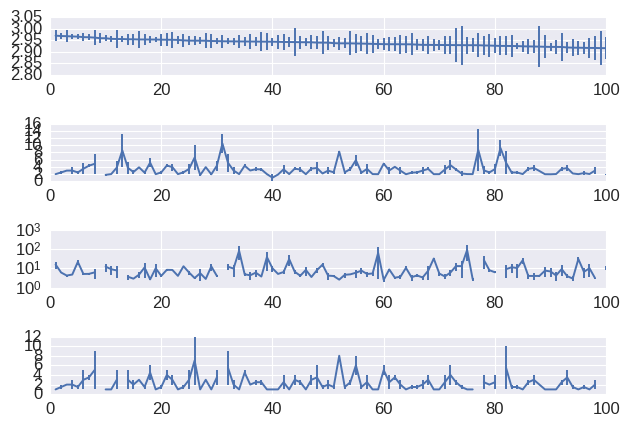

In [33]:
with sns.plotting_context('paper', font_scale=1.5):
    fig, ax = plt.subplots(4)
    ax[0].errorbar(x=df_ordered['rank'], y=df_ordered['test_scores_mean'], yerr=df_ordered['test_scores_error'])
    ax[1].errorbar(x=df_ordered['rank'], y=df_ordered['cse_test_scores_mean'], yerr=df_ordered['cse_test_scores_error'])
    ax[2].errorbar(x=df_ordered['rank'], y=df_ordered['cse_train_gaps_mean'], yerr=df_ordered['cse_train_gaps_error'])
    ax[2].set_yscale('log')
    ax[3].errorbar(x=df_ordered['rank'], y=df_ordered['cse_train_n_timescales_mean'], yerr=df_ordered['cse_train_n_timescales_error'])
plt.tight_layout()